# Theano 패키지 소개

Theano 패키지는 GPU를 지원하는 선형 대수 심볼 컴파일러(Symbolic Linear Algebra Compiler)이다. 심볼 컴파일러란 수치적인 미분, 선형 대수 계산 뿐 아니라 symbolic expression을 통해 정의된 수식(주로 목적 함수)을 사람처럼 미분하거나 재정리하여 전체 계산에 대한 최적의 계산 경로를 찾아내는 소프트웨어를 말한다. 수치 미분을 사용한 연산에 비해 정확도나 속도가 빠르기 때문에 대용량 선형 대수 계산이나 몬테카를로 시뮬레이션, 또는 딥 러닝에 사용된다.
Theano 패키지의 또다른 특징은 GPU와 CPU에 대해 동일한 파이썬 코드를 사용할 수 있다는 점이다. 아래는 GPU를 사용한 Theano 연산 결과를 비교한 것이다.

<img src="http://deeplearning.net/software/theano/_images/mlp.png">

## GPGPU 

GPU는 GPGPU(General-Purpose computing on Graphics Processing Units: 범용 그래픽 연산 유니트)를 줄어서 쓰는 말이다. 
그래픽 작업은 다음 그림에서 보듯 상당한 병렬 연산을 필요로 하기 때문에 일반 CPU와 달리 성능이 낮은 다수의 코어를 동시에 사용할 수 있는 구조를 가지고 있다. 이러한 구조는 단순한 계산을 반복해야 하는 몬테카를로 시뮬레이션이나 딥 러닝에서 상당한 효과를 볼 수 있다.

<img src="http://cdn.iopscience.com/images/1742-5468/2009/06/P06016/Full/1354202.jpg">


<img src="http://bioinfo-fr.net/wp-content/uploads/2012/02/cpugpu_1.png"> 

## CUDA vs OpenCL

GPU는 기본 구조가 일반적인 CPU와 다르기 때문에 저수준 명령어 체계가 다르므로 별도의 플랫폼과 라이브러리가 필요하다. 현재 많이 사용되는 GPU 연산용 플랫폼에는 nvidia 계열의 CUDA와 Apple, AMD, Intel 계열의 OpenCL 이 있다. 파이썬에서는 pyCUDA 패키지와 pyOpenCL 패키지를 사용할 수 있다.

## Theano 기본 사용법

Theano를 사용하기 위해서는 다음과 같은 과정을 거쳐야 한다. 

1. 심볼 변수 정의
2. 심볼 관계 정의
3. 심볼 함수 정의
4. 심볼 함수 사용


### 심볼 변수 정의

Theano의 모든 변수는 심볼 변수이므로 수치 변수와 혼동이 되지 않게 별도로 정의해야 한다. 

스칼라, 벡터, 행렬을 정의하기 위해 `theano.tensor.T` 서브패키지의 `dscalar`, `dvector`, `dmatrix` 명령을 사용하거나 이미 심볼로 정의된 변수의 연산을 통해 자동으로 정의된다. 명령어 앞에 붙은 `d`는 double 자료형을 나타낸다.

In [1]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [2]:
import theano
import theano.tensor as T

In [3]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [4]:
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

벡터와 행렬도 마찬가지 방법으로 정의한다.

In [5]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

In [6]:
x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

### 심볼 관계 정의

이미 만들어진 심볼 변수에 일반 사칙연산이나 Theano 수학 함수를 사용하여 종속 변수 역할을 하는 심볼 변수를 만들 수 있다.

In [7]:
z1 = x1 + y1

In [8]:
type(z1)

theano.tensor.var.TensorVariable

In [9]:
u1 = T.exp(z1)

In [10]:
type(u1)

theano.tensor.var.TensorVariable

In [11]:
z2 = T.dot(x2, y2)

In [12]:
z3 = T.sum(x3) + T.mean(y3)

### 심볼 프린트

Theano의 심볼 변수의 내용을 살펴보기 위해서는 `theano.printing.pprint` 명령 또는 `theano.printing.pydotprint` 을 사용한다.

In [13]:
theano.printing.pprint(x1)

'x1'

In [14]:
theano.printing.pprint(y1)

'y1'

In [15]:
theano.printing.pprint(z1)

'(x1 + y1)'

In [16]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [17]:
from IPython.display import SVG

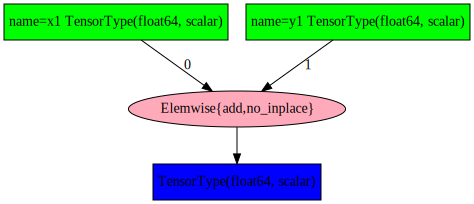

In [18]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

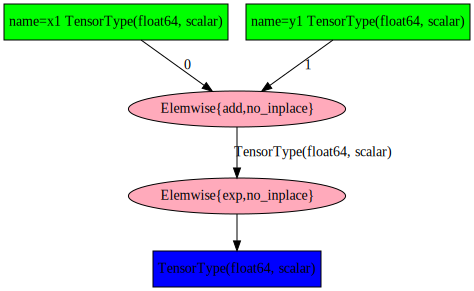

In [19]:
SVG(theano.printing.pydotprint(u1, return_image=True, format='svg'))

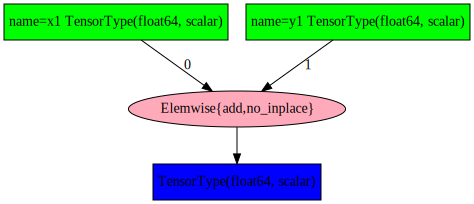

In [20]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

### 심볼 함수

심볼 함수는 `theano.function` 명령으로 정의하며 입력 심볼 변수와 출력 심볼 변수를 지정한다. 출력 심볼 변수는 입력 심볼 변수의 연산으로 정의되어 있어야 한다. 

처음 심볼 함수를 정의할 때는 내부적으로 컴파일을 하기 때문에 시간이 다소 걸릴 수 있다.

In [21]:
%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

CPU times: user 130 ms, sys: 20 ms, total: 150 ms
Wall time: 146 ms


함수의 값을 계산하려면 일반 함수와 같이 사용하면 된다.

In [22]:
f1(1, 2)

array(3.)

벡터와 행렬도 마찬가지 방법으로 사용한다.

In [23]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.)

In [24]:
f3 = theano.function([x3, y3], z3)
f3([[1], [2]], [[3], [4]])

array(6.5)

로지스틱 함수나 난수를 사용하는 함수는 다음과 같이 정의한다.

In [25]:
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.73105858)

In [26]:
s2 = 1 / (1 + T.exp(-x2))
logistic2 = theano.function([x2], s2)
logistic2([0, 1])

array([0.5       , 0.73105858])

함수에서 디폴트 인수는 다음과 같이 `In` 명령을 사용해서 정의한다.

In [27]:
x1, y1 = T.dscalars('x1', 'y1')
z1 = x1 + y1
f1 = theano.function([x1, theano.In(y1, value=2)], z1)
f1(1)

array(3.)

난수 발생도 theano 의 `RandomStreams` 명령을 사용해야 한다.

In [28]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
rv_n = srng.normal((2,))

f_rv_u = theano.function([], rv_u)
g_rv_n = theano.function([], rv_n, no_default_updates=True)

In [29]:
f_rv_u(), f_rv_u(), f_rv_u(), f_rv_u()

(array(0.48604732), array(0.68571232), array(0.98557605), array(0.19559641))

In [30]:
g_rv_n(), g_rv_n(), g_rv_n(), g_rv_n()

(array([1.99759307, 0.35128336]),
 array([1.99759307, 0.35128336]),
 array([1.99759307, 0.35128336]),
 array([1.99759307, 0.35128336]))

### 변수 갱신

심볼의 값을 갱신(update)하는 수식은 단순한 심볼 그래프로 표현할 수 없다.
갱신되는 값은 수식으로 연결되는 심볼이 아니라 단순한 메모리 상의 값이기 때문이다. 
따라서 이러한 값들은 공유 메모리(shared memory)라는 곳에 저장한다.
또한 공유 메모리의 값을 갱신하는 것은 심볼 그래프가 아니라 함수에서 직접 다음처럼 `updates` 인수를 사용해야 한다.

예를 들어 다음과 같은 수식을 생각하자.

$$ w_{k+1} = w_k + x $$

이 값을 갱신하는 코드는 다음과 같다.

In [31]:
w1 = theano.shared(0.0, name="w1")
update = theano.function([x1], y1, givens=[(y1, w1)], updates=[(w1, w1 + x1)])

In [32]:
w1.set_value(f_rv_u())
w1.get_value()

array(0.58341167)

In [33]:
update(1)
w1.get_value()

array(1.58341167)

In [34]:
update(2)
w1.get_value()

array(3.58341167)

In [35]:
update(1)
w1.get_value()

array(4.58341167)

### 그래프 최적화

Theano는 빠른 함수 계산을 위한 그래프 최적화를 지원한다. 예를 들어 다음과 같은 함수는 제곱 연산을 사용하여 최적화 할 수 있다.

In [36]:
x1 = T.vector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

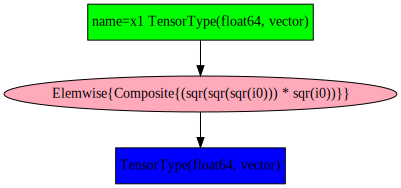

In [37]:
SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

함수 실행 속도를 비교해 보면 다음과 같다.

In [38]:
x1 = np.ones(10000000)

In [39]:
%timeit x1 ** 10

459 ms ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit f1(x1)

49.7 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 미분 

심볼릭 연산의 가장 큰 장점은 빠르고 정확하게 미분값(gradient, Hessian 등)을 계산할 수 있다는 점이다.

In [41]:
x1 = T.dscalar('x1')
y1 = x1 ** 2
gy1 = T.grad(y1, x1)
fy1 = theano.function([x1], y1)
fgy1 = theano.function([x1], gy1)

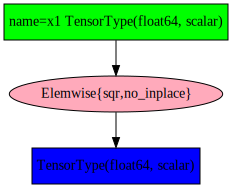

In [42]:
SVG(theano.printing.pydotprint(fy1.maker.fgraph.outputs[0], return_image=True, format='svg'))

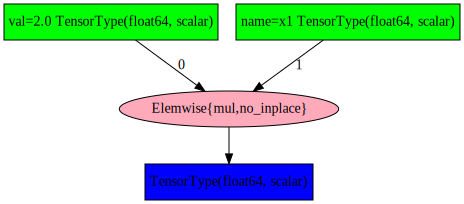

In [43]:
SVG(theano.printing.pydotprint(fgy1.maker.fgraph.outputs[0], return_image=True, format='svg'))

In [44]:
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
gs1 = T.grad(s1, x1)
dlogistic = theano.function([x1], gs1)

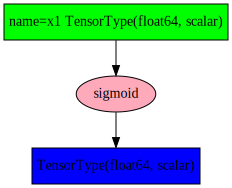

In [45]:
SVG(theano.printing.pydotprint(logistic, return_image=True, format='svg'))

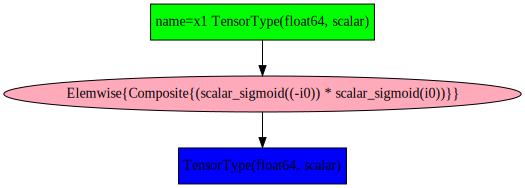

In [46]:
SVG(theano.printing.pydotprint(dlogistic.maker.fgraph.outputs[0], return_image=True, format='svg'))

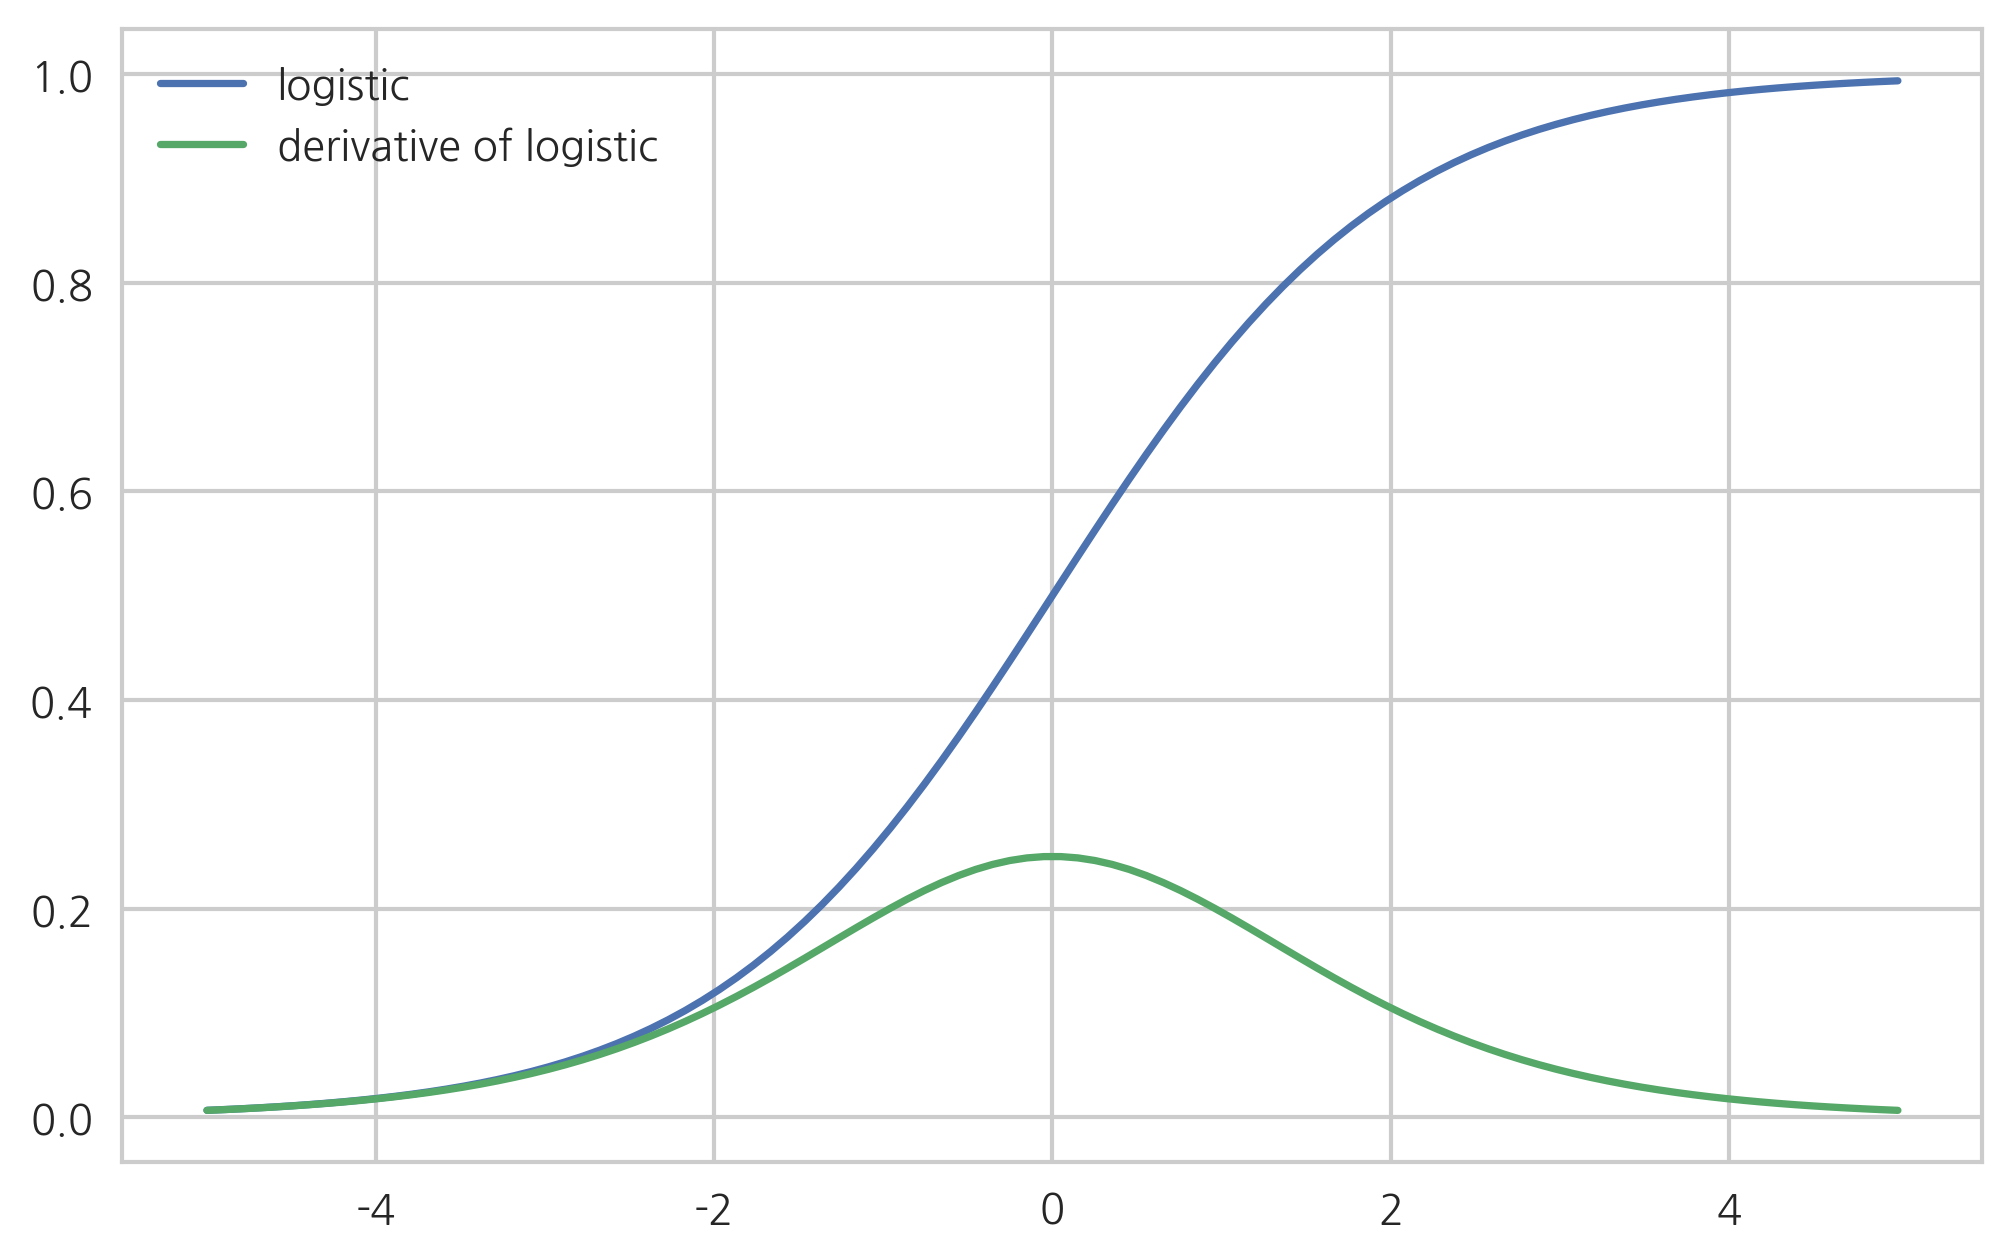

In [47]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

## 퍼셉트론 구현

Theano를 사용하면 다음과 같이 퍼셉트론을 구현할 수 있다.

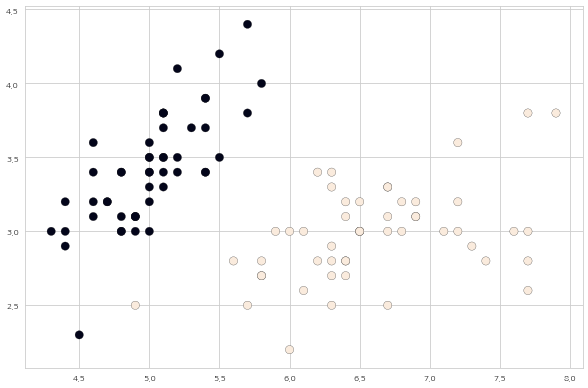

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

출력을 `a`, 목적 함수를 `cost`, 목적 함수의 미분(그레디언트)을 `gradient`로 정의한다.

In [49]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
d = T.tanh(T.dot(X, w) + b)
cost = T.sum(T.maximum(0, -y * d))

In [50]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-7
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

초기값에서 그레디언트 값을 계산하고 이를 이용하여 가중치를 갱신한다.

In [51]:
for i in range(100):
    cost_i = train(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  0.5588424928848522
  10:  0.4645058718722919
  20:  0.37016250114427207
  30:  0.27581374670328085
  40:  0.18146097498533956
  50:  0.08710555275029427
  60:  0.0017481157550485488
  70:  0.0003194822026270444
  80:  0.00029294220762885446
  90:  0.0002921062099464225


In [52]:
y_pred = T.sgn(d)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 1, 49]])

#### 연습 문제 1

위 퍼셉트론 코드를 다음과 같이 고쳐라.

1. y값은 0과 1이라는 값만 가진다.
2. 활성화 함수는 로지스틱 함수를 사용한다.
3. 코스트 함수는 다음과 같은 오차 제곱 합수를 사용한다.
$$ C = \sum_{i=1}^N (y - \hat{y})^2 $$

## 참조 문헌

다음은 Theano를 사용하는데 도움이 되는 참조 문서 목록이다.

 * http://ir.hit.edu.cn/~jguo/docs/notes/a_simple_tutorial_on_theano.pdf
 * http://mlg.eng.cam.ac.uk/yarin/PDFs/RCC-Auto-Diff-presentation.pdf
 * http://speech.ee.ntu.edu.tw/~tlkagk/courses/MLDS_2015_2/Lecture/Theano%20DNN.pdf
 